In [158]:
import pandas as pd
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

Исходные данные

In [159]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]


Создаем два датафрейма

In [160]:
df_p = pd.DataFrame(petersburg)
df_p

,0
0,0.0974
1,0.1352
2,0.0817
3,0.1016
4,0.0968
5,0.1064
6,0.1050


In [161]:
df_m = pd.DataFrame(magadan)
df_m

,0
0,0.1033
1,0.0915
2,0.0781
3,0.0685
4,0.0677
5,0.0697
6,0.0764
7,0.0689


Объеденяем два датафрейма в один

In [162]:
df=df_m.join(df_p, how='left',  rsuffix='left')

Переименовываем столбцы

In [163]:
df.rename(columns={'0': 'petersburg', '0left': 'magadan'}, inplace=True)

In [164]:
df

,petersburg,magadan
0,0.1033,0.0974
1,0.0915,0.1352
2,0.0781,0.0817
3,0.0685,0.1016
4,0.0677,0.0968
5,0.0697,0.1064
6,0.0764,0.1050
7,0.0689,NaN


Заменяем отсутствующие значение в столбце Магадан на среднее значение это столбца

In [165]:
df['magadan']=df['magadan'].fillna((df['magadan'].mean()))
df

,petersburg,magadan
0,0.1033,0.097400
1,0.0915,0.135200
2,0.0781,0.081700
3,0.0685,0.101600
4,0.0677,0.096800
5,0.0697,0.106400
6,0.0764,0.105000
7,0.0689,0.103443


Обоснуйте выбор теста на корреляцию. 

In [166]:
df.corr()

,petersburg,magadan
petersburg,1.000000,0.244558
magadan,0.244558,1.000000


In [167]:
df.corr(method = 'spearman')

,petersburg,magadan
petersburg,1.000000,0.166667
magadan,0.166667,1.000000


Из шкалы степеней силы связи и коэффициента корреляции связь между признаками отражает силу связи "Отсутствие связи или очень слабая связь" исходя из значения коэффициента корреляции = 0.244558, корреляция по методу Спирмена составляев 0.166667.

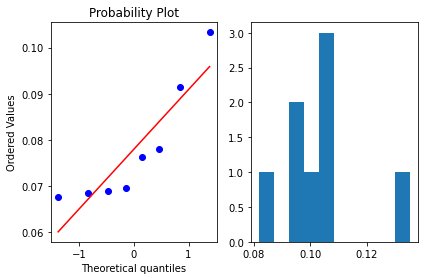

In [168]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['petersburg'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['magadan']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Корреляци Спирмена и Кендала используется для нахождения взаимосвязей между категориальными переменными, а не числовыми признаками. Еще выбор корреляции пал на Пирсона, потому что у них есть линейная взаимосвязь, как показано на графике

# Проверка данных на нормальноесть

In [169]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [170]:
alpha = 0.05

## Тест Шапиро-Уилка

In [171]:
from scipy.stats import shapiro

In [181]:
_, p = shapiro(df)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.100
Нет значимой разницы между мидиям Петербурга и Магадана.


## Тест Д’Агостино

In [173]:
from scipy.stats import normaltest

In [174]:
_, p = normaltest(df)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.154
Данные распределены нормально


C:\Users\total\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Независимый T-тест 

In [175]:
from scipy.stats import ttest_ind

In [176]:
H0 = 'Нет значимой разницы между мидиям Петербурга и Магадана.'
Ha = 'Есть значимая разница между мидиям Петербурга и Магадана.'

Зависимая переменная, размер мидий, является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [179]:
def t_test(data_):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df['magadan'], df['petersburg'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df)


*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между мидиям Петербурга и Магадана.


Данные распределены нормально,данные являются параметрическими, количественными. В выборке учавствует два объекта. Поэтому используем Т-тест

# ANOVA тест

In [182]:
from scipy.stats import f_oneway


Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [183]:
_, p = f_oneway(petersburg, magadan)

In [186]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в двух разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в двух разных местах.'

In [187]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.004940324868384318 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в двух разных местах.


Разница в размерах мидий от городов производителей

In [191]:
dif = df['magadan'].mean()-df['petersburg'].mean()

In [192]:
dif

0.025430357142857143

In [193]:
daf = dif/df['petersburg'].mean()
daf

0.3259779797193673

Средний размер мидий из Магада больше среднего размера мидий из Петербурга на 0.025430357142857143 или 32.5%